# Tensorflow İle Regresyon Çalışması

```
İçindekiler

1. Tensorflow ile regresyona giriş
2. Veri
  2.1. Örnek bir veri seti hazırlanması
  2.2. Veri ile ilgili incelemeler
3. Model
  3.1. Modelleme adımları
  3.2. İlk modelin oluşturulması
  3.3. Modeli geliştirme
  3.4. Görselleştirme
  3.5. Eğitim ve test setlerinin oluşturulması
  3.6. Model özeti ve modeli uydurma
4. Tahminler
  4.1. Tahminleri görselleştir
  4.2. Tahminleri değerlendir
5. Modeli geliştirme adımları
  5.1. model_1
  5.2. model_2
  5.3. model_3
  5.4. Sonuçları karşılaştır
6. Modeli kaydetme ve yükleme
7. Sağlık sigortası çalışması
  7.1. Verileri yükleme işlemi
  7.2. Verileri inceleme
  7.3. Eğitim ve test setlerine veriyi bölme
  7.4. Modeli hazırlama
  7.5. Yeni bir model daha deneme
  7.6. Modeli değerlendirme
  7.7. Verileri ön işleme
8. Kaynakça
```

# 1. Tensorflow İle Regresyona Giriş

### 1. Veriyi Hazırlama
İlk adım, kullanacağınız veriyi doğru şekilde hazırlamaktır. Veri setini yükledikten sonra, özellikler (bağımsız değişkenler) ile hedef değişkeni (bağımlı değişken) ayırmak gerekir. Bu adımda ayrıca veriyi eğitim ve test setlerine bölecek şekilde ayarlamalar yapılmalıdır.

### 2. Eğitim ve Test Verisine Ayırma
Modelin doğruluğunu değerlendirebilmek için veriyi eğitim (train) ve test (test) olarak ayırmak önemlidir. Eğitim seti modelin öğrenmesi için kullanılırken, test seti modelin daha önce görmediği veriler üzerindeki başarısını değerlendirmeye yarar.

### 3. Modeli Oluşturma
TensorFlow ile regresyon modelini oluşturmak için, bir yapay sinir ağı (YSA) kullanabilirsiniz. Bu modelde, giriş katmanı (input layer) ile veriyi alır, bir veya birden fazla gizli katmandan geçer ve çıkış katmanında (output layer) hedef değişkeni tahmin eder. Gizli katmanlarda genellikle doğrusal olmayan aktivasyon fonksiyonları kullanılır (örneğin ReLU). Çıkış katmanında ise, regresyon için genellikle doğrusal bir aktivasyon fonksiyonu (ya da hiç aktivasyon fonksiyonu) kullanılır.

### 4. Modeli Derleme
Modeli oluşturduktan sonra, onu optimize etmek için bir kayıp fonksiyonu (loss function) ve bir optimizer seçmeniz gerekir. Regresyon problemleri için yaygın olarak kullanılan kayıp fonksiyonu "mean squared error" (MSE) ve optimizasyon algoritması ise genellikle "adam"dır.

### 5. Modeli Eğitme
Modelin eğitilmesi için eğitim verilerini kullanarak ağırlıkların ve parametrelerin optimizasyonunu sağlarsınız. Bu işlem sırasında model, verileri analiz ederek tahmin yapmayı öğrenir. Eğitim sürecinde modelin doğruluğu ve kaybı her iterasyonda izlenebilir.

### 6. Modeli Değerlendirme
Model eğitildikten sonra, test verisi kullanılarak değerlendirilir. Bu aşamada, modelin test seti üzerindeki performansı kayıp fonksiyonu ile ölçülür. Bu, modelin ne kadar doğru tahminler yaptığı hakkında bilgi verir.

### 7. Tahmin Yapma
Model eğitildikten ve değerlendirildikten sonra, yeni veriler üzerinde tahmin yapmak mümkündür. Bu aşama, modelin eğitim sırasında öğrendiği bilgileri kullanarak gerçek dünya verilerini tahmin etmek için kullanılır.

### 8. Modelin Performansını Değerlendirme
Modelin başarısını değerlendirmek için genellikle **Mean Squared Error (MSE)** gibi metrikler kullanılır. Ayrıca, **R-squared (R²)** gibi regresyon spesifik metrikleri de modelin başarısını daha iyi değerlendirmeye yardımcı olabilir. Bu metrikler, modelin ne kadar doğru tahminler yaptığı hakkında bilgi verir.

### Özetle:
- Veriyi hazırlayın ve eğitim/test setlerine ayırın.
- Modeli oluşturun, genellikle bir yapay sinir ağı ile regresyon modeli kurulur.
- Modeli derleyin ve uygun kayıp fonksiyonu ile optimizer'ı seçin.
- Modeli eğitim verisi üzerinde eğitin.
- Test verisi ile modelin doğruluğunu değerlendirin.
- Yeni veriler üzerinde tahmin yaparak modelin performansını test edin.
- Son olarak, modelin başarısını değerlendirmek için uygun metrikler kullanın.

# 2. Veri

### 2.1. Örnek Veri Setinin Hazırlanması

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

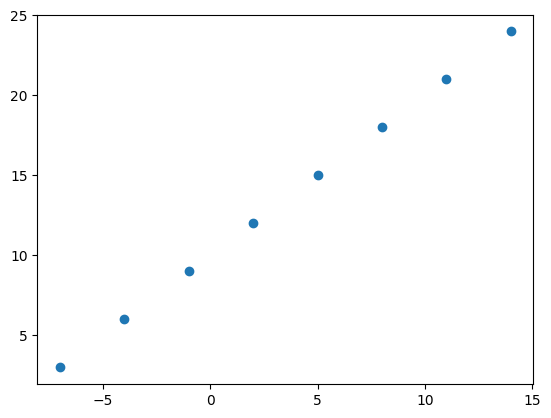

In [ ]:
# Verileri görselleştir
plt.scatter(X, y);

In [ ]:
y == X + 10 # desek doğru çıkar :)

array([ True,  True,  True,  True,  True,  True,  True,  True])

### 2.2. Verileri Keşfet

In [ ]:
input_shape = X.shape # modele girecek verinin şekli
output_shape = y.shape # modelden çıkmasını istediğimiz sonucun şekli

input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape_1 = X[0].shape
output_shape_1 = y[0].shape

input_shape_1, output_shape_1

((), ())

Bu verilere göre -7.0'ye eşit olan X[0] ile 3.0'e eşit olan y[0] arasındaki kalıbı tahmin etmek için bir model oluşturmaya çalışıyoruz. Sinir ağları ile çalışırken girdi ve çıktı şeklini doğru ayarlamak çok önemlidir.

In [ ]:
# Örnek --> Regresyon modellerinde girdi ve çıktı şekilleri
house_info = tf.constant(["yatak_odası", "banyo", "garaj"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'yatak_odas\xc4\xb1', b'banyo', b'garaj'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Numpy dizilerini tensörlere dönüştürmeliyiz
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape_1 = X[0].shape
output_shape_1 = y[0].shape

input_shape_1, output_shape_1, X[0].ndim

(TensorShape([]), TensorShape([]), 0)

# 3. Model

# 3.1. Modelleme Adımları

- Bir sinir ağının katmanlarını (işlevsel veya sıralı API kullanarak) bir araya getirilir veya önceden oluşturulmuş bir model içe aktarılır.
- Model derlemesi (compile), bir modelin performansının nasıl ölçülmesi gerektiğini (kayıp/metrik) tanımlamanın yanı sıra nasıl iyileştirilmesi gerektiğini (optimize edici) tanımlama.
- Modeli uydurma (fit), modelin verilerdeki kalıpları bulmaya çalışmasıdır.

Burada Keras Sequential API kullanılıyor.

**Kaynak**
* https://www.tensorflow.org/guide/keras/functional_api
* https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0 (tf.2.7 notları)
* https://keras.io/

### 3.2. İlk Modelin Hazırlanması

In [ ]:
%%time

# Random seed ayarı
tf.random.set_seed(42)

# Sıralı API ile modeli ayarlama
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # Giriş katmanı
])

# Modeli derle
model.compile(
    loss = tf.keras.losses.mae, # ortalama mutlak hata
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

# Modeli eğit
model.fit(
    tf.expand_dims(X, axis=-1), # Giriş
    y,
    epochs = 5 # veri seti üzerinden beş kez geçer
    )

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.6145 - mae: 13.6145
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 13.4820 - mae: 13.4820
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.3495 - mae: 13.3495
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.2170 - mae: 13.2170
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.0845 - mae: 13.0845
CPU times: user 1.15 s, sys: 65.5 ms, total: 1.22 s
Wall time: 1.95 s


tf.random.set_seed(42) --> Modelin eğitim sırasında rastgeleliğin sabit olmasına vesiledir. Aynı kodu tekrar çalıştırdığında yine aynı sonucu alırsın.

Sequential --> model katmanları sırasıyla eklenir. Her katmandan gelen çıktı, bir sonraki katmanın girdisidir.

Dense(1) --> Tek yoğun katman var, 1 nöronlu. Model tek bir sayı tahmin etmeye çalışır.

loss --> Model eğitim sırasında mae kayıp fonksiyonunu kullandı. Hedef, tahmin edilen değerler ile gerçek değerler arasındaki farkın ortalamasını minimize etmektir.

optimizer --> SGD ile eğitim verisinin rastgele küçük grupları üzerinden modelin ağırlıklarını güncelleyen bir optimizasyon yöntemidir.

metrics --> Model doğruluğunu anlamak için bu metrik belirlenmiş.

tf.expand_dims(X, axis=-1) --> X dizisi, modelin beklediği şekle uygun olmayabilir. Dense katmanı genellikle girişin 2D formatta (örneğin, (n_samples, n_features)) olmasını bekler. Bu nedenle X'i expand_dims fonksiyonu ile yeniden şekillendiriyoruz. axis=-1 parametresi, her örneği tek bir özellik (feature) içeren bir 2D dizisine dönüştürür. Bu, modelin beklentisine uygun bir formatta olur.

### **`tf.expand_dims` Fonksiyonu:**
`tf.expand_dims` fonksiyonu, bir tensor (veri yapısı) üzerinde **yeni bir boyut** ekler. Bu, genellikle veri şekliyle ilgili uyumsuzlukları gidermek veya modelin beklediği şekle uygun hale getirmek için kullanılır.

```python
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
```
Bu, 1D bir NumPy dizisi, yani şekli `(8,)` (8 elemanlı bir dizi).

**`axis=-1`**: Bu parametre, yeni boyutun verinin **sonuna** eklenmesini belirler. Yani, 1D diziyi bir adım daha uzatarak 2D bir dizi haline getirir.

**Sonuç**: Bu işlem, `X`'i şu şekilde değiştirir:
  ```python
  X_expanded = np.array([[-7.0], [-4.0], [-1.0], [2.0], [5.0], [8.0], [11.0], [14.0]])
  ```

Artık `X_expanded` bir **2D NumPy array**'idir ve şekli `(8, 1)`'dir. Yani, 8 örnek (satır) ve her örnek için bir özellik (sütun) vardır.

### **Neden `axis=-1` kullanılır?**
Bu noktada, modelinizin giriş verisini **2D** formatında alması gerektiğini unutmayın. Keras ve TensorFlow, her örnek için birden fazla özelliğe sahip olmasını bekler. Bu durumda, tek bir özelliğe sahip (yani her örneğin sadece bir sayısı var) bir dizi olduğunda, giriş verisinin şekli 2D olmalı.

Modeliniz, özellikle **`Dense`** katmanını kullanırken, 2D bir girdi bekler:
- İlk boyut (satır), örnek sayısını ifade eder.
- İkinci boyut (sütun), her örneğin özellik sayısını ifade eder.

`X` aslında **1D** bir dizi olduğundan, `axis=-1` ile bu diziyi **2D**'ye dönüştürüyorsunuz. Bu dönüşüm, modelin doğru şekilde çalışabilmesi için gereklidir.

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# 17.0'ı bir NumPy array'e dönüştürüp model ile tahmin yapın
prediction = model.predict(np.array([[17.0]]))  # Tek bir örnek, tek bir özellik
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[2.468811]]


In [ ]:
predictions = model.predict(np.array([[17.0], [18.0], [19.0]]))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[2.468811 ]
 [2.611094 ]
 [2.7533772]]


### 3.3. Modeli Geliştirme

- Daha fazla katman eklenebilir, nöron sayısı arttırılabilir, her katmanın aktivasyon işlevi değiştirilebilir.
- Model derlemede optimizasyon işlevi değiştirilebilir.
- Modeli takmada, daha fazla veri veya daha uzun dönem sayısı gerekebilir.

In [ ]:
# Dönem sayısı arttırılarak yeni deneme
%%time

# Random seed ayarı
tf.random.set_seed(42)

# Sıralı API ile modeli ayarlama
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # Giriş katmanı
])

# Modeli derle
model.compile(
    loss = tf.keras.losses.mae, # ortalama mutlak hata
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

# Modeli eğit
model.fit(
    tf.expand_dims(X, axis=-1), # Giriş
    y,
    epochs = 100 # veri seti üzerinden beş kez geçer
    )

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.2204 - mae: 12.2204
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - loss: 12.0879 - mae: 12.0879
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.9554 - mae: 11.9554
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.8229 - mae: 11.8229
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.6904 - mae: 11.6904
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.5579 - mae: 11.5579
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.4254 - mae: 11.4254
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.2929 - mae: 11.2929
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.1604 - mae: 11.1604
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.0279 - mae: 11.0279
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.8954 - mae: 10.8954
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.7629 - mae: 10.7629
Epoch 13/100
1/1 ━━━━━━━━━

In [ ]:
# Sonuçlar biraz iyileşti
predictions = model.predict(np.array([[17.0], [18.0], [19.0]]))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[29.670092]
 [31.365686]
 [33.061283]]


In [ ]:
# Üç yeni katman eklendi, optimize edici Adam yapıldı
%%time

# Random seed ayarı
tf.random.set_seed(42)

# Sıralı API ile modeli ayarlama
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1) # Giriş katmanı
])

# Modeli derle
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["mae"]
)

# Modeli eğit
model.fit(
    tf.expand_dims(X, axis=-1), # Giriş
    y,
    epochs = 100 # veri seti üzerinden beş kez geçer
    )

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.2637 - mae: 13.2637
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.9184 - mae: 12.9184
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.6163 - mae: 12.6163
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.3275 - mae: 12.3275
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.0440 - mae: 12.0440
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.7530 - mae: 11.7530
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.4557 - mae: 11.4557
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.2393 - mae: 11.2393
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.0234 - mae: 11.0234
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.7968 - mae: 10.7968
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.5598 - mae: 10.5598
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.3130 - mae: 10.3130
Epoch 13/100
1/1 ━━━━━━━━━━

In [ ]:
# Tahmin değerleri nasıl değişti?
predictions = model.predict(np.array([[17.0], [18.0], [19.0]]))
print(predictions) # normalde y = X + 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
[[31.125376]
 [32.79318 ]
 [34.46102 ]]


### 3.4. Veriyi Görselleştirme
* Veriler - hangi verilerle çalışıyorsunuz? Neye benziyor?
* Modelin kendisi - mimari neye benziyor? Farklı şekiller nelerdir?
* Bir modelin eğitimi - bir model öğrenirken nasıl performans gösterir?
* Bir modelin tahminleri - bir modelin tahminleri temel gerçeğe (orijinal etiketler) karşı nasıl hizadadır?

#### 3.4.1. Daha Büyük Bir Veri Seti İle Çalışma

In [2]:
X = tf.range(-100, 100, 4)
y = tf.range(-90, 110, 4)

X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

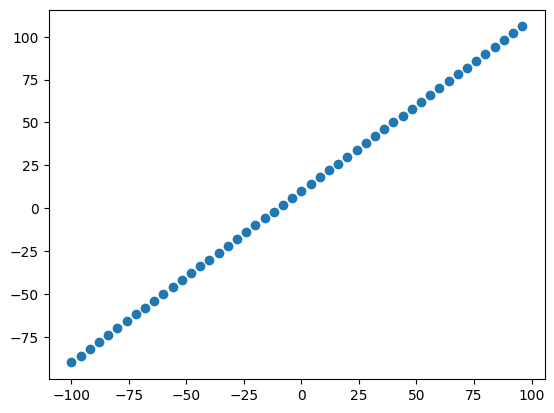

In [ ]:
# Veriyi görselleştirelim

plt.scatter(X, y);

### 3.5. Eğitim ve Test Veri Setlerinin Oluşturulması

* Eğitim seti - model, mevcut toplam verilerin tipik olarak %70-80'i olan bu verilerden öğrenir (dönem boyunca çalıştığınız ders materyalleri gibi).
* Doğrulama seti - model, genellikle mevcut toplam verilerin %10-15'i olan (final sınavından önce girdiğiniz uygulama sınavı gibi) bu verilere göre ayarlanır.
* Test seti - model, öğrendiklerini test etmek için bu veriler üzerinde değerlendirilir, tipik olarak mevcut toplam verilerin %10-15'idir (dönem sonunda girdiğiniz final sınavı gibi).

***Modelimizin eğitim verileri üzerinde öğrenmesini ve daha sonra görünmeyen örneklere ne kadar iyi genellediğine dair bir gösterge almak için test verileri üzerinde değerlendirmesini istiyoruz.***

In [ ]:
# Ne kadar örneğimiz var?
len(X)

50

In [3]:
# Eğitim ve test verilerinin oluşturulması

X_train = X[:40] # ilk 40 değerdir
y_train = y[:40]

X_test = X[40:] # son 10 değerdir
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

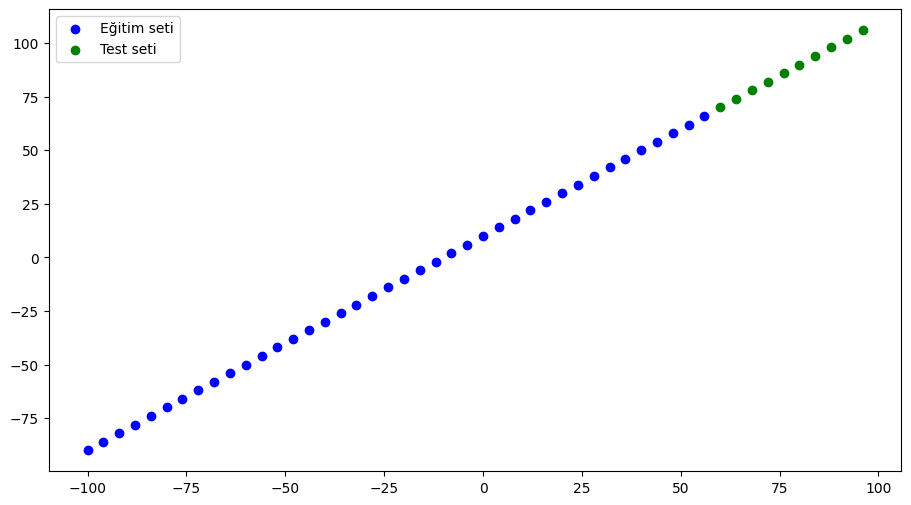

In [ ]:
plt.figure(figsize = (11, 6))

plt.scatter(X_train, y_train, c = "b", label = "Eğitim seti") # b--> mavi renk
plt.scatter(X_test, y_test, c = "g", label = "Test seti") # g --> yeşil renk
plt.legend();

In [4]:
# Şekiller ayarlı olmadığı için summary()'de hata alınır

# Random seed ayarı
tf.random.set_seed(42)

# Sıralı API ile modeli ayarlama
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Modeli derle
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Modeli eğit
# model.fit(
#    tf.expand_dims(X, axis=-1), # Giriş
#    y,
#   epochs = 100 # veri seti üzerinden beş kez geçer
#    )

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [5]:
# Giriş şekli 1, bir sayı seçeriz

# Random seed ayarı
tf.random.set_seed(42)

# Sıralı API ile modeli ayarlama
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# Modeli derle
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Modeli eğit
# model.fit(
#    tf.expand_dims(X, axis=-1), # Giriş
#    y,
#   epochs = 100 # veri seti üzerinden beş kez geçer
#    )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### **Modelde `input_shape=[1]` Neden Verilir?**

Keras `Dense` katmanında **`input_shape`** parametresi, modelin beklediği **girdi verisinin şekli**ni belirtir.

- **Girdi şekli**: Girdi verisi, genellikle bir 2D tensor olarak kabul edilir, çünkü modeliniz birden fazla örnek alacak. Bu nedenle girdi, `(örnek sayısı, özellik sayısı)` şeklinde olmalıdır.

Bu modelde:
- **Örnek sayısı**: Modelin eğitileceği veri setindeki toplam örnek sayısıdır (yani kaç farklı veri noktası).
- **Özellik sayısı**: Her örneğin sahip olduğu veri noktalarıdır (bu örnekte, her örneğin yalnızca bir özelliği var, yani tek bir sayıya sahip).

#### Modelin Yapısı:
```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])
```

### **Girdi Şekli Neden Önemlidir?**

Modelin **girdi şekli**ni doğru belirtmek, modelin nasıl veri alacağı ve bu veriyi nasıl işleyeceği ile ilgilidir. Bu durumda:
- **`input_shape=[1]`** ifadesi, her örneğin yalnızca **bir özellik** içerdiğini belirtir. Bu durumda girdi verisi, **tek bir sayıyı** temsil eder (örneğin, `X_train`'deki her sayı).

### **Girdi Verisinin Şekli Nasıl Olmalı?**

Modelin `input_shape=[1]` alması gerektiği, her bir örneğin yalnızca **tek bir özellik** içerdiği anlamına gelir. Ancak, Keras, modelin giriş verisini her zaman **2D array** olarak bekler. Çünkü her bir örnek, bir özellikten (veya birden fazla özellikten) oluşabilir.

Örneğin, `X_train` dizisi şöyle olabilir:

```python
X_train = tf.range(-100, 100, 4)[:40]
# Bu durumda X_train şekli (40,) olur.
```

Bu 1D diziyi **2D** hale getirmek için `expand_dims` kullanabilirsiniz:
```python
X_train = tf.expand_dims(X_train, axis=-1)  # X_train şimdi (40, 1) olacak
```

In [7]:
# Modeli şimdi uydur
model.fit(
    X_train,
    y_train,
    epochs = 100, # verbose --> ne kadar çıktı alınacağını kontrol eder
    verbose = 1
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - loss: 71.2379 - mae: 71.2379
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.2341 - mae: 36.2341 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7524 - mae: 8.7524 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6191 - mae: 8.6191
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3916 - mae: 8.3916 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1254 - mae: 9.1254 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2062 - mae: 8.2062 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8646 - mae: 8.8646 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8041 - mae: 7.8041 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7856 - mae: 10.7856 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6063 - mae: 7.6063 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9602 - mae: 11.9602
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

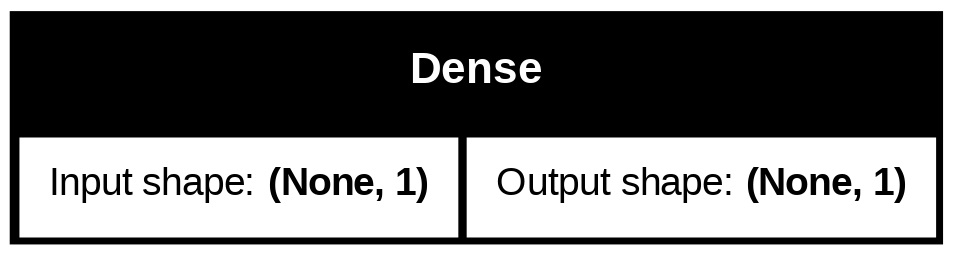

In [ ]:
# Ayrıca modelin iki boyutlu grafiği de görüntülenebilir
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### **`plot_model()` Fonksiyonu:**
`plot_model()` fonksiyonu, Keras modelinizi bir **şematik diyagram** olarak çizer. Bu diyagramda modelin katmanları, katmanların çıkışları ve özellikleri görsel olarak gösterilir.

**`show_shapes=True`**: Bu parametre, modelin her katmanının **girdi ve çıktı şekillerini** gösterir. Eğer `show_shapes=False` olarak ayarlanırsa, sadece katmanlar gösterilir, ancak her katmanın giriş ve çıkış şekilleri belirtilmez.

In [9]:
# farklı özelliklerdeki bir modelin özeti nasıl olur?
# Random seed ayarı
tf.random.set_seed(42)

# Sıralı API ile modeli ayarlama
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "giris_katmani"),
    tf.keras.layers.Dense(1, name = "cikis_katmani")
], name = "model_1")

# Modeli derle
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ giris_katmani (Dense)                │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cikis_katmani (Dense)                │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

**Input Layer** (`input_layer`): Bu, modelin **girdi katmanı**dır. Modelin ilk katmanı olduğu için burada **girdi şekli** (yani her örneğin hangi boyutlarda veriye sahip olduğunu) belirtilir. Bu katman:
   - `Dense(10)`: 10 nöronlu bir yoğun katmandır.
   - **`input_shape=[1]`**: Her örneğin yalnızca **1 özellik** (feature) içerdiğini belirtir. Yani, model her bir örneği tek bir sayı olarak alacak.

**Output Layer** (`output_layer`): Bu, modelin **çıkış katmanı**dır. Modelin sonucunu üretir. Burada:
   - `Dense(1)`: 1 nöronlu bir yoğun katmandır, yani model tek bir çıktı üretecektir.

### **Modeldeki Katmanlar ve Girdi/Çıktı Şekli**

- Modelde iki katman bulunmaktadır:
  1. **Input Layer**: 1 özellik (girdi) alır ve 10 nöronlu bir katmanda işler.
  2. **Output Layer**: 10 nöronlu katmandan gelen veriyi işler ve **tek bir sayı (output)** üretir.

Girdi şekli **`input_shape=[1]`** parametresiyle belirtilmiştir, bu da her örneğin yalnızca bir sayıdan oluştuğunu belirtir. Bu nedenle, `input_layer` bu tek sayıyı alır ve 10 nöronlu bir katmanda işler. Ardından, **`output_layer`** bu işlenmiş bilgiyi tek bir sayı olarak **çıktı**ya dönüştürür.

**Stokastik Gradyan İnişi (SGD)** algoritması, modelin ağırlıklarını, kayıp fonksiyonunu minimize etmek amacıyla küçük adımlarla günceller.
   - SGD, her adımda **verinin küçük bir alt kümesi (batch)** üzerinde çalışarak ağırlıkları günceller, bu da eğitim sürecini hızlandırabilir ve büyük veri kümelerinde daha etkili olabilir.

**`metrics` (Başarı Ölçütleri)**:
   - **`metrics`** parametresi, modelin eğitim sürecindeki başarısını ölçen metrikleri belirtir.
   - Burada **`["mae"]`** kullanılmış, yani **Ortalama Mutlak Hata (Mean Absolute Error)**, eğitim sırasında **modelin doğruluğunu** ölçmek için kullanılacaktır.
   - Bu, modelin tahminlerinin doğruluğunu izlemek için kullanılır, yani her eğitim adımında modelin **ortalama mutlak hatasını** gösterir.

### **Eğitim Süreci ve `compile` Fonksiyonu**:

- Model **`compile()`** fonksiyonu ile **eğitim için hazırlanır**. Bu, modelin kayıp fonksiyonunu, optimizasyon algoritmasını ve başarı metriklerini belirtir.
- Eğitim sırasında, optimizasyon algoritması (`SGD`), kayıp fonksiyonunu minimize etmek için modelin **ağırlıklarını günceller**.
- Model her adımda **tahminlerini** yapar ve gerçek değerlerle kıyaslar. Bu karşılaştırma sonucunda **kayıp** hesaplanır. Daha sonra, **`metrics`** olarak belirtilen metrik (bu durumda `mae`) kullanılarak modelin başarısı takip edilir.


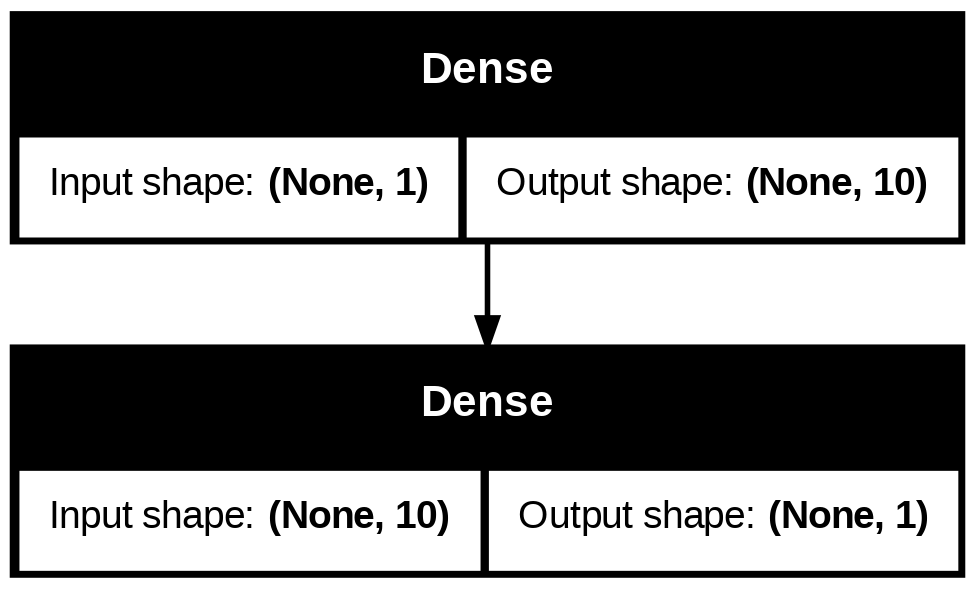

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

# 4. Tahminler

### 4.1. Tahminleri Görselleştirme

In [10]:
# Bazı tahminlerde bulunma
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[-25.719767],
       [-27.43441 ],
       [-29.149061],
       [-30.863712],
       [-32.57836 ],
       [-34.293007],
       [-36.007668],
       [-37.722317],
       [-39.436974],
       [-41.15162 ]], dtype=float32)

In [11]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [12]:
# Tahminleri görselleştir

def tahminleri_gorsellestir(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_preds
    ):

  """
  Eğitim verisi, test verisi ve tahminleri karşılaştır
  """

  plt.figure(figsize = (11, 7))

  plt.scatter(train_data, train_labels, c = "b", label = "Eğitim verileri")

  plt.scatter(test_data, test_labels, c = "g", label = "Test verileri")

  plt.scatter(test_data, predictions, c = "r", label = "Tahminler")

  plt.legend();

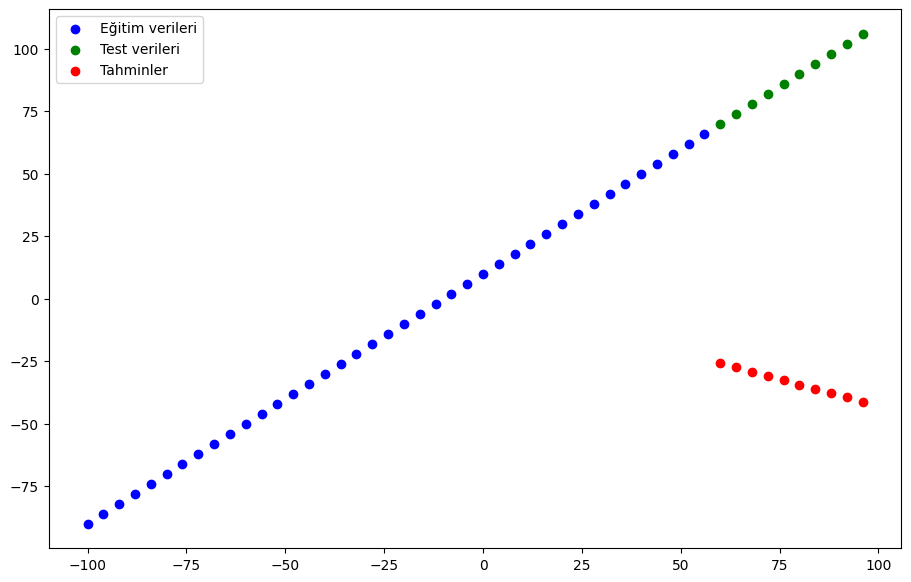

In [13]:
tahminleri_gorsellestir(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### 4.2. Tahminleri Değerlendir

Regresyon problemleri için kullanılan ana metriklerden ikisi şunlardır:
* Ortalama mutlak hata (MAE) - tahminlerin her biri arasındaki ortalama fark.
* Ortalama kare hata (MSE) - tahminler arasındaki kare ortalama fark (daha büyük hatalar küçük hatalardan daha zararlıysa kullanın).

Bu değerlerin her biri ne kadar düşükse o kadar iyidir.

Ayrıca, derleme adımı sırasında herhangi bir metrik kurulumunun yanı sıra modelin kaybını döndürecek olan model.evaluate() kullanabilirsiniz.

Bizim durumumuzda, kayıp fonksiyonunda MAE ve metriklerde MAE kullandığımız için, model.evaulate() ikisini de döndürür.

In [14]:
# Modeli değerlendir
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 121.4357 - mae: 121.4357


[121.4356918334961, 121.4356918334961]

MAE -->
- Herhangi bir regresyon modelinde kullanılabilir.
- tf.keras.losses.MAE()
- tf.metrics.mean_absolute_error

MSE -->
- Daha büyük hataların küçük hatalardan daha önemli oldukları durumda.
- tf.keras.losses.MSE()
- tf.metrics.mean_square_error

Huber -->
- Aykırı değişimlere karşı MSE'den daha az duyarlı.
- MSE ve MAE birleşimi.
- tf.keras.losses.Huber()

In [16]:
from tensorflow.keras.metrics import MeanAbsoluteError

mae_metric = MeanAbsoluteError() # MAE nesnesi oluştur

mae_metric.update_state(y_test, y_preds) # Test verisi ile tahminler arasındaki hatayı hesapla
# update_state ile her bir değer tek tek işlem görür

mae_value = mae_metric.result().numpy() # MAE değerini al

print("Ortalama Mutlak Hata:",mae_value) # İki ayrı öge yazdırmak için virgül


Ortalama Mutlak Hata: 121.43569


In [19]:
# y_test ve y_preds şekilleri farklı
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [20]:
 y_test.shape

TensorShape([10])

In [21]:
y_preds

array([[-25.719767],
       [-27.43441 ],
       [-29.149061],
       [-30.863712],
       [-32.57836 ],
       [-34.293007],
       [-36.007668],
       [-37.722317],
       [-39.436974],
       [-41.15162 ]], dtype=float32)

In [22]:
y_preds.shape

(10, 1)

y_preds'in bir boyutunu Squeeze() kullanarak y_test ile aynı yapabiliriz.

***🔑 Not: İki tensörü karşılaştırıyorsanız, doğru şekil(ler) olduklarından emin olmak önemlidir (şekilleri her zaman manipüle etmek zorunda kalmayacaksınız, ancak her zaman dikkat edin, birçok hata uyumsuz tensörlerin, özellikle uyumsuz giriş ve çıkış şekillerinin sonucudur).***

In [23]:
# y_preds şeklini değiştirelim
y_preds.squeeze().shape

(10,)

In [26]:
from tensorflow.keras.metrics import MeanAbsoluteError

mae_metric = MeanAbsoluteError() # MAE nesnesi oluştur

mae_metric.update_state(y_test, y_preds.squeeze()) # Test verisi ile tahminler arasındaki hatayı hesapla

mae_value = mae_metric.result().numpy() # MAE değerini al

print("Ortalama Mutlak Hata:",mae_value)

Ortalama Mutlak Hata: 121.43569


In [28]:
from tensorflow.keras.metrics import MeanSquaredError

mse_metric = MeanSquaredError() # MSE nesnesi oluştur

mse_metric.update_state(y_test, y_preds.squeeze()) # Test verisi ile tahminler arasındaki hatayı hesapla

mse_value = mse_metric.result().numpy() # MSE değerini al

print("Ortalama Kare Hata:",mse_value)

Ortalama Kare Hata: 15016.049


In [30]:
# Gerçek değerler ile model tahminleri arasındaki farkın mutlak değerini aldık
# reduce_mean --> tüm hesaplanan değerin ortalamasını alır
# Bunu anlamak için matematiksel gösterimine bak
tf.reduce_mean(tf.abs(y_test - y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=121>

In [31]:
def mae(y_test, y_pred):
  """
  y_test ve y_preds arasında ortalama mutlak hata değerini hesapla
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  y_test ve y_preds arasında ortalama kareler hatası değerini hesapla
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# 5. Modeli Geliştirme Adımları

Modeli geliştirmede bazı yollar;
- Daha fazla veri
- Daha karmaşık modeller (katman sayısı veya nöron sayısı yüksek)
- Daha uzun süre denemeler

1. model_1 --> orjinal model ile aynı, 1 katmanlı ve 100 dönem eğitimli
2. model_2 --> 2 katmanlı ve 100 dönem için eğitilmiş
3. model_3 --> 2 katmanlı ve 500 dönem için eğitilmiş

### 5.1. model_1

In [32]:
# Random seed ayarı
tf.random.set_seed(42)

# Orjinal modeli kopyala
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Modeli derleme
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Modeli uydur
model_1.fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step - loss: 12.0343 - mae: 12.0343
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2175 - mae: 8.2175 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7628 - mae: 8.7628 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6295 - mae: 8.6295 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3957 - mae: 8.3957 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1419 - mae: 9.1419 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2103 - mae: 8.2103 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8810 - mae: 8.8810 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9280 - mae: 7.9280 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5622 - mae: 9.5622 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9101 - mae: 7.9101 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.5506 - mae: 9.5506 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


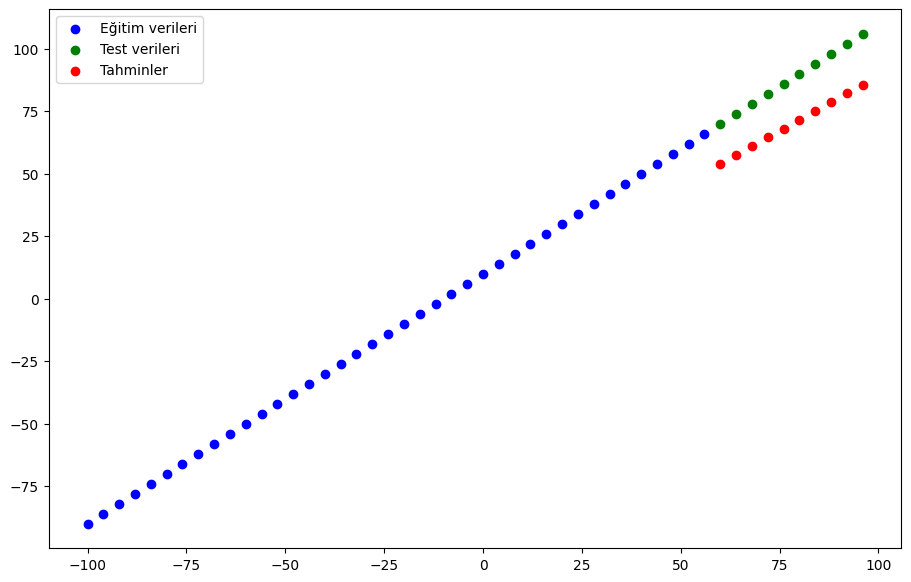

In [35]:
# model_1 için grafik çiz
y_preds_1 = model_1.predict(X_test)
tahminleri_gorsellestir(predictions = y_preds_1) # yukarıda bunun fonks. yazılıydı

In [36]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError

#MAE ve MSE nesneleri oluştur
mae_metric = MeanAbsoluteError()
mse_metric = MeanSquaredError()

# Test verisi ve tahminler arasındaki hatayı hesaplayın
mae_metric.update_state(y_test, y_preds_1.squeeze())
mse_metric.update_state(y_test, y_preds_1.squeeze())

# Sonuçları alın
mae_1 = mae_metric.result().numpy()
mse_1 = mse_metric.result().numpy()

print("MAE:", mae_1)
print("MSE:", mse_1)

MAE: 18.15593
MSE: 331.62912


### 5.2. model_2

In [41]:
# Random seed ayarı
tf.random.set_seed(42)

# Orjinal modeli kopyala
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) #ikinci katmandır
])

# Modeli derleme
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Modeli uydur
model_2.fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs = 100,
    verbose = 0
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


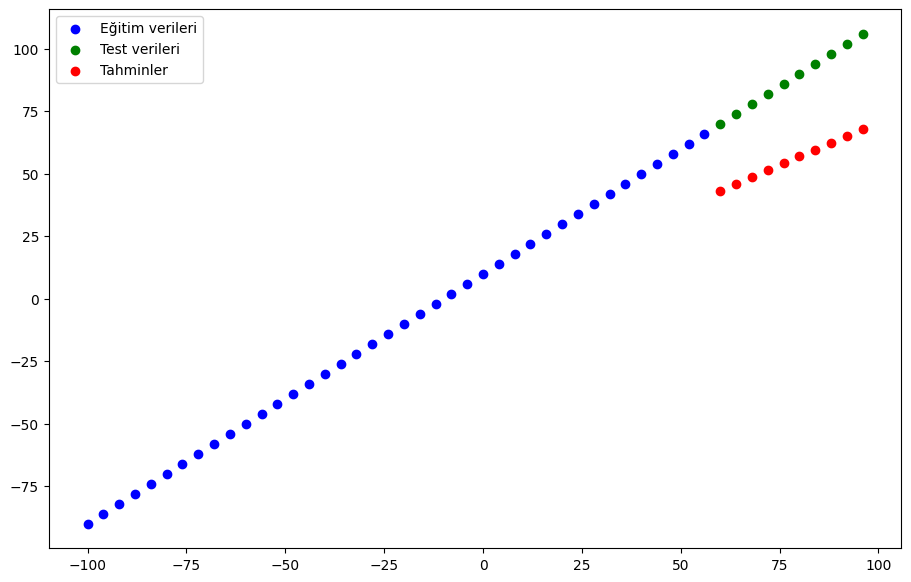

In [42]:
y_preds_2 = model_2.predict(X_test)
tahminleri_gorsellestir(predictions = y_preds_2)

In [43]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError

# MAE ve MSE metric nesnelerini oluşturun
mae_metric = MeanAbsoluteError()
mse_metric = MeanSquaredError()

# Test verisi ve tahminler arasındaki hatayı hesaplayın
mae_metric.update_state(y_test, y_preds_2.squeeze())  # squeeze() ile şekil uyumsuzluğu giderilebilir
mse_metric.update_state(y_test, y_preds_2.squeeze())

# Sonuçları alın
mae_2 = mae_metric.result().numpy()
mse_2 = mse_metric.result().numpy()

print("MAE:", mae_2)
print("MSE:", mse_2)

MAE: 32.457466
MSE: 1066.4229


### 5.3. model_3

In [44]:
# Random seed ayarı
tf.random.set_seed(42)

# Orjinal modeli kopyala
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Modeli derleme
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Modeli uydur
model_3.fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs = 500,
    verbose = 0
)

- `verbose=0`: Hiçbir çıktı gösterilmez.
- `verbose=1`: İlerleme çubuğu ile birlikte eğitim bilgileri gösterilir.
- `verbose=2`: Eğitim bilgileri sadece satır satır gösterilir, ancak ilerleme çubuğu yoktur.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


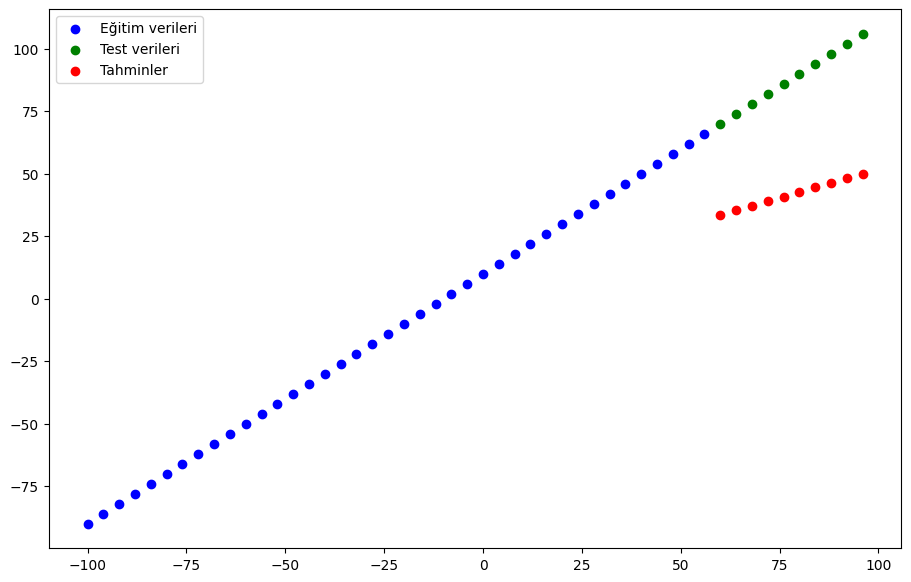

In [46]:
y_preds_3 = model_3.predict(X_test)
tahminleri_gorsellestir(predictions=y_preds_3)

In [47]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError

# MAE ve MSE metric nesnelerini oluşturun
mae_metric = MeanAbsoluteError()
mse_metric = MeanSquaredError()

# Test verisi ve tahminler arasındaki hatayı hesaplayın
mae_metric.update_state(y_test, y_preds_3.squeeze())  # squeeze() ile şekil uyumsuzluğu giderilebilir
mse_metric.update_state(y_test, y_preds_3.squeeze())

# Sonuçları alın
mae_3 = mae_metric.result().numpy()
mse_3 = mse_metric.result().numpy()

print("MAE:", mae_3)
print("MSE:", mse_3)

MAE: 46.180824
MSE: 2171.2053


### 5.4. Sonuçları Karşılaştır

In [48]:
model_sonucları = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]
]

sonuclar  = pd.DataFrame(model_sonucları, columns = ["Model", "MAE", "MSE"])
sonuclar

,Model,MAE,MSE
0,model_1,18.155930,331.629120
1,model_2,32.457466,1066.422852
2,model_3,46.180824,2171.205322


- TensorBoard - modelleme deneylerini izlemeye yardımcı olmak için TensorFlow kitaplığının bir bileşeni (bunu daha sonra göreceğiz).
- Ağırlıklar ve Önyargılar - her türlü makine öğrenimi deneyini izlemek için bir araç (Ağırlıklar ve Önyargılar için iyi haber, TensorBoard'a takılmasıdır).

https://tensorboard.dev/

https://wandb.ai/site/

# 6. Bir Modeli Kaydetmek ve Yüklemek

Bir modeli eğittikten ve beğeninize göre performans gösteren bir model bulduktan sonra, muhtemelen başka bir yerde (bir web uygulaması veya mobil cihaz gibi) kullanmak üzere kaydetmek isteyeceksiniz.

Model.save() kullanarak bir TensorFlow/Keras modelini kaydedebilirsiniz.

Bir modeli TensorFlow'da kaydetmenin iki yolu vardır:

SavedModel formatı (varsayılan).

HDF5 formatı.

İkisi arasındaki temel fark, SavedModel'in modeli tekrar yüklerken ek değişiklikler yapmadan özel nesneleri (özel katmanlar gibi) otomatik olarak kaydedebilmesidir.

Hangisini kullanmalısınız?

Durumunuza bağlı, ancak SavedModel formatı çoğu zaman yeterli olacaktır.

Her iki yöntem de aynı yöntem çağrısını kullanır.

https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#savedmodel_format

https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#hdf5_format

Kaydedilen modeller dosya sekmesinde görünür (colab).

Optimize edicinin durumu, eğitime tam olarak kaldığınız yerden devam etmenize olanak tanır.

In [49]:
# Model kaydetme
model_2.save('best_model.h5') # veya .keras

Load_model() yöntemini kullanarak kaydedilmiş bir modeli yükleyebiliriz.

In [50]:
loaded_saved_model = tf.keras.models.load_model("best_model.h5")
loaded_saved_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Bu modeli lokaline yükleme
from google.colab import files
files.download("best_model.h5")

In [54]:
import tensorflow as tf
# Yüklenmiş modeli tekrar yükle
loaded_saved_model = tf.keras.models.load_model('best_model.h5')

# MAE metriğini tanımla
mae_metric = tf.keras.metrics.MeanAbsoluteError()

# Her iki modeli de tahmin et
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)

# Doğru etiketler ve tahminlerle durumu güncelle
mae_metric.update_state(y_test, model_2_preds.squeeze())
mae_model_2 = mae_metric.result().numpy()

mae_metric.reset_state()  # karışıklığı önlemek için resetleme

mae_metric.update_state(y_test, saved_model_preds.squeeze())
mae_saved_model = mae_metric.result().numpy()

# MAE değerlerini karşılaştır
print("model_2 için MAE:", mae_model_2)
print("aved_model için MAE:", mae_saved_model)
print("MAE değerleri eşit mi?", mae_model_2 == mae_saved_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
model_2 için MAE: 32.457466
aved_model için MAE: 32.457466
MAE değerleri eşit mi? True


### **Açıklamalar:**

1. **`tf.keras.metrics.MeanAbsoluteError()`**: Bu sınıf, **ortalama mutlak hata (MAE)** hesaplamak için kullanılır. Bu sınıfı kullanarak MAE hesaplayabilirsiniz.
   
2. **`update_state(y_test, predictions)`**: Gerçek etiketler (`y_test`) ile modelin tahminlerini (`predictions`) karşılaştırarak MAE'yi hesaplar.

3. **`result()`**: `update_state()` ile hesaplanan MAE'yi döndürür. Bu bir tensör olarak döndüğü için, `numpy()` fonksiyonu ile numpy dizisine dönüştürülür.

4. **`reset_state()`**: Bu fonksiyon, MAE metriğini sıfırlamak için kullanılır. İki modelin MAE değerlerini ayrı ayrı hesaplamak için bu adımdan sonra metriği sıfırlamak önemlidir.

# 7. Sağlık Sigortası Çalışması

Yaş, cinsiyet, çocuklar, sigara içme durumu ve konut_bölgesi gibi bir dizi farklı parametreye dayanarak bireyler için sağlık sigortasının maliyetini tahmin etmeye çalışacağız.

Bunu yapmak için, Kaggle'da bulunan ve GitHub'da barındırılan kamuya açık olarak mevcut Tıbbi Maliyet veri kümesinden yararlanacağız.

🔑 Not: Makine öğrenimi paradigmalarını öğrenirken, genellikle bir dizi temel teknikten geçer ve ardından açık kaynaklı veri kümeleri ve örneklerle çalışarak bunları uygularsınız. Tıpkı şimdi yaptığımız gibi, temelleri öğrenin, onları farklı problemlerle çalıştırın. Yeni bir şey üzerinde her çalıştığınızda, probleminizin yerine X yerine "Python/TensorFlow ile X problemi örneği" gibi bir şey aramak iyi bir fikirdir.

https://www.kaggle.com/datasets/mirichoi0218/insurance

https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 7.1. Verileri Yükleme

In [56]:
# Veriyi yükle
sigorta = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [57]:
sigorta.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Sayısal olmayan sütunları sayılara dönüştürmek zorunda kalacağız (çünkü bir sinir ağı -sayısal olmayan girdileri işleyemez).

Bunu yapmak için, pandalarda get_dummies() yöntemini kullanacağız.

Kategorik değerleri sayısal değerlere dönüştürmek için one_hot yöntemi kullanılır.

### 7.2. Verileri İnceleme

In [58]:
# Tüm kategorileri rakamlara dönüştür
sigorta_one_hot = pd.get_dummies(sigorta)
sigorta_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


### 7.3. Eğitim ve Test Setlerini Oluştur

In [59]:
X = sigorta_one_hot.drop("charges", axis=1)
y = sigorta_one_hot["charges"]

Eğitim ve test setleri oluşturmada manuel olarak yapabiliriz, ancak kolaylaştırmak için Scikit-Learn'de mevcut olan train_test_split işlevinden yararlanacağız.

In [60]:
# Eğitim ve test veri setleri oluştur
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # %20'sini aldık
                                                    random_state=42)

In [61]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

### 7.4. Modeli Hazırla

In [62]:
# Random seed ayarla
tf.random.set_seed(42)

# Modeli oluştur
sigorta_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Modeli derle
sigorta_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# Modeli Uydur
sigorta_model.fit(
    X_train,
    y_train,
    epochs = 100,
    verbose = 1
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 13294.1357 - mae: 13294.1357
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13154.5176 - mae: 13154.5176 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12872.0166 - mae: 12872.0166 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12293.7812 - mae: 12293.7812
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11271.7676 - mae: 11271.7676 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9851.7754 - mae: 9851.7754
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8406.7100 - mae: 8406.7100 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7547.9141 - mae: 7547.9141 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7397.9868 - mae: 7397.9868 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7369.3784 - mae: 7369.3784 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7347.6382 - mae: 7347.6382 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━

In [63]:
# Model sonuçları
sigorta_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4909.6289 - mae: 4909.6289


[4768.91845703125, 4768.91845703125]

Ortalamadan 4768 kadar sapılmış.

Model çok iyi performans göstermedi.

In [64]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### 7.5. Yeni Bir Model Daha Deneme

In [68]:
# Katman sayısı arttırıldı ve öğrenme oranı 0.001 eklendi

# Random seed ayarla
tf.random.set_seed(42)

# Modeli oluştur
sigorta_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Modeli derle
sigorta_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)
# SGD çalışmaz...

# Modeli Uydur
tarih = sigorta_model_2.fit( #grafik çizmek için değişken atadık
    X_train,
    y_train,
    epochs = 100,
    verbose = 0
)

### 7.6. Modeli Değerlendirme

In [66]:
sigorta_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3219.1997 - mae: 3219.1997


[3160.302734375, 3160.302734375]

Daha büyük bir model ve Adam optimize edici kullanmak, önceki modele göre neredeyse daha az hatayla sonuçlanır.

🔑 Not: Birçok sorun için, Adam optimizer harika bir başlangıç seçimidir. Daha fazlası için kaynakça:

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

http://karpathy.github.io/2019/04/25/recipe/

http://karpathy.github.io/2019/04/25/recipe/

Text(0.5, 0, 'dönem')

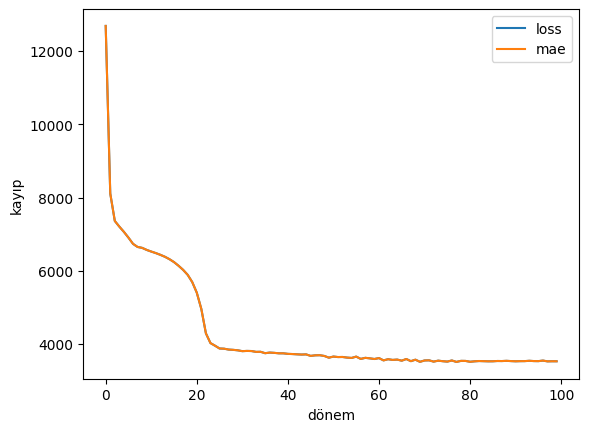

In [70]:
# Görselleştir
pd.DataFrame(tarih.history).plot()
plt.ylabel("kayıp")
plt.xlabel("dönem")

Bundan, modelimizin kaybı (ve MAE) hala azalıyor gibi görünüyor (bizim durumumuzda, MAE ve kayıp aynı, dolayısıyla olay örgüsündeki çizgiler birbiriyle örtüşüyor).

Bunun bize söylediği şey, daha uzun süre eğitmeye çalışırsak kaybın düşebileceğidir.

🤔 Soru: Ne kadar süre antrenman yapmalısın?

Hangi sorun üzerinde çalıştığınıza bağlı. Bazen eğitim çok uzun sürmez, bazen beklediğinizden daha uzun sürer. Yaygın bir yöntem, model eğitiminizi çok uzun bir süre (örneğin 1000'lerce dönem) ayarlamaktır, ancak bunu bir EarlyStopping geri araması ile ayarlamaktır, böylece iyileştirmeyi durdurduğunda otomatik olarak durur. Bunu başka bir modülde göreceğiz.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [71]:
# Modeli daha uzun süre uydur
tarih_2 = sigorta_model_2.fit(
    X_train,
    y_train,
    epochs = 300,
    verbose = 0
)

In [75]:
# 300 dönemlik eğitilmiş modeli değerlendir
sigorta_model_2_loss, sigorta_model_2_mae = sigorta_model_2.evaluate(X_test, y_test)

sigorta_model_2_loss, sigorta_model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3291.5271 - mae: 3291.5271 


(3240.099853515625, 3240.099853515625)

Text(0.5, 0, 'dönem')

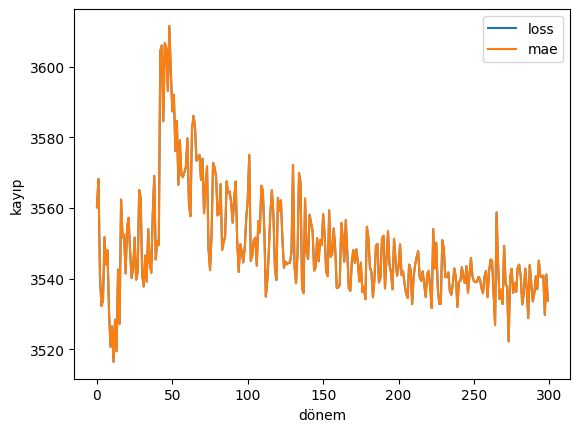

In [76]:
# Görselleştir
pd.DataFrame(tarih_2.history).plot()
plt.ylabel("kayıp")
plt.xlabel("dönem")

### 7.7. Verileri Ön İşleme

# Ön işleme verileri (normalleştirme ve standardizasyon)

Sinir ağlarıyla çalışırken yaygın bir uygulama, onlara aktardığınız tüm verilerin 0 ila 1 aralığında olduğundan emin olmaktır.

Bu uygulamaya normalleştirme denir (tüm değerlerin orijinal aralıklarından, örneğin 0 ile 100.000 arasında 0 ile 1 arasında olacak şekilde ölçeklendirilmesi).

Tüm verilerinizi birim varyansına ve 0 ortalamasına dönüştüren başka bir işlem çağrısı standardizasyonu vardır.

Bu iki uygulama genellikle bir ön işleme boru hattının parçasıdır (verilerinizi sinir ağlarıyla kullanıma hazırlamak için bir dizi işlev).

Bunu bilerek, verilerinizi bir sinir ağı için önceden işlemek için atacağınız önemli adımlardan bazıları şunlardır:

- Tüm verilerinizi sayılara dönüştürmek (bir sinir ağı dizeleri işleyemez).
- Verilerinizin doğru şekilde olduğundan emin olmak (giriş ve çıkış şekillerini doğrulamak).
- Özellik ölçekleme:
  - Verileri normalleştirme (tüm değerlerin 0 ile 1 arasında olduğundan emin olmak). Bu, minimum değerin çıkarılması ve ardından maksimum değer eksi minimum değere bölünmesiyle yapılır. Buna min-max ölçekleme de denir.
  - Standardizasyon (tüm değerlerin ortalamasının 0 ve varyansının 1 olduğundan emin olmak). Bu, hedef özellikten ortalama değerin çıkarılması ve ardından standart sapmaya bölünmesi ile yapılır.

Hangisini kullanmalısınız?

Sinir ağları ile 0 ile 1 arasındaki değerleri tercih etme eğiliminde olduklarından normalleştirmeyi tercih etme eğiliminde olacaksınız (bunu özellikle görüntü işleme ile göreceksiniz), ancak genellikle bir sinir ağının minimum özellik ölçeklemesi ile oldukça iyi performans gösterebileceğini göreceksiniz.

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Get_dummies() kullanarak verilerimizi zaten sayılara dönüştürdük, bakalım nasıl normalleştireceğiz.

Get data ready (turn into tensors) üç adımı vardı);
* veriyi rakamlara dönüştürme
* tüm tensörlerin doğru şekillerde olduğundan emin olma
* Scala feature - Özellikleri ölçeklendirme (normalleştirme, standartlaştırma, nöral ağlar standarda meyillidir)

**Not**

Normalleştirme --> veri kümesindeki sayısal sütunlardaki değerleri ortak bir ölçekte değiştirmektir, değer aralığındaki farklılıkları bozmadan!

Normalleştirmenin amacı, veri kümesindeki sayısal sütunların değerlerini ortak bir ölçekte değiştirmektir. Orijinal dağılımı korurken tüm değerleri sıfır ile bir arasında dönüştürür.
Verilerimizin dağılımı sadece yayılmadır. Ne zaman kullanılır? --> Nöral ağlardaki temel skaladır. Fonksiyon adı **MinMaxScaler**

Standartlaştırma --> Ortalamayı çıkartır ve her değeri standart sapmaya böler. Fonksiyon adı **StandartScaler**. Ne zaman kullanılır? --> Bir özellik sütununu normal dağılıma yakın bir dağılıma sahip olmak için dönüştürmek içindir. Ancak özelliklerimizi ölçeklendirirsek veya özelliklerimizi standartlaştırırsak, bu aykırıların etkilerini azaltır.

In [77]:
# Veriyi yeniden yükle
sigorta = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [78]:
sigorta.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Şimdi, daha önce olduğu gibi, sayısal olmayan sütunları sayılara dönüştürmemiz gerekiyor ve bu sefer farklı aralıklara sahip sayısal sütunları da normalleştireceğiz (hepsinin 0 ile 1 arasında olduğundan emin olmak için).

Bunu yapmak için Scikit-Learn'den birkaç ders kullanacağız:
- Make_column_transformer - aşağıdaki dönüşümler için çok adımlı bir veri ön işleme işlevi oluşturun:
  - MinMaxScaler - tüm sayısal sütunların normalleştirildiğinden emin olun (0 ile 1 arasında).
  - OneHotEncoder - bir sıcak kodlayıcı sayısal olmayan sütunları.

  https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

* Sütunları dönüştürmek için column transformer kullanıldı.
* make_column_transformer: Verilen Transformatörlerden bir sütun transformatörü inşa etmekte kullanılır.
* handle_unknown="ignore" --> bilmediği kolon varsa görmezden gelmesi içindir.
* Veri çerçevesini yukarıda yeniden içeri aktardığımız için x ve y değerlerini oluşturduk.
* Modelin bazı eğitim verileri üzerinde eğitmek ve görmediği bazı veriler üzerinde değerlendirmek isteriz bunun için train ve test olarak bölündü...
* Bir tür sütun transformatörüne sahip olduğunuzda, eğitim verilerinize sığdırın ve ardından test verilerinizi dönüştürmek için bu uygun sütun transformatörünü kullanın, çünkü aksi takdirde, bunu ayrı ayrı yaparsanız, test verileri veridir.
Model daha önce hiç görülmemiştir.
Yani temelde gelecekten gelen veriler. Yani eğitim veri setimizi test veri setinden gelen bilgilerle dönüştürüyorsak, bu almak gibi
gelecekten gelen bilgi ve şu anda sahip olduğumuz verileri değiştirmektir.

In [79]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Sütun dönüştürücü oluştur (veriyi işlemede kolaylaştırıcıdır)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # tüm değerler 0-1 arası olur
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# X & y oluştur
X = sigorta.drop("charges", axis=1)
y = sigorta["charges"]

# Eğitim ve test veri setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sadece eğitim verilerinde sütun dönüştürücü yap
# test verileri sonuçta veri sızıntısı yapabilir
ct.fit(X_train)

# Eğitim ve test verilerini normalleştir(MinMaxScalar) ve tek sıcak kodlama(OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

- **`make_column_transformer`**: Bu fonksiyon, sütunlar üzerinde farklı dönüşümler uygulamak için kullanılır. Yani, bazı sütunları normalleştirirken (örneğin, sayısal sütunlar), diğerlerini **one-hot encoding** ile kategorilere dönüştürmek için kullanılabilir.
- **`MinMaxScaler`**: Sayısal verileri **0 ile 1 arasına normalleştirir**. Bu, modelin daha hızlı ve stabil öğrenmesini sağlar.
- **`OneHotEncoder`**: Kategorik sütunları, her kategoriyi **0** ve **1** değerleri ile temsil eden bir sütuna dönüştürür (yani **one-hot encoding** yapar). Bu, kategorik verilerin makine öğrenmesi modelleri tarafından işlenmesini sağlar.

- **`ct.fit()`**: Eğitim verisini kullanarak column transformer'ı uygulayacak olan dönüşüm işlevini fit eder. Bu işlem, MinMaxScaler'ın parametrelerini ve OneHotEncoder'ın kategorik verilerini belirler.

In [81]:
# Normalleşmemiş...
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [82]:
# Normalleşmiş
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [83]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [84]:
# Random seed ayarla
tf.random.set_seed(42)

# Modeli oluştur
sigorta_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Modeli derle
sigorta_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)
# SGD çalışmaz...

# Modeli Uydur
sigorta_model_3.fit( #grafik çizmek için değişken atadık
    X_train_normal,
    y_train,
    epochs = 300,
    verbose = 0
)

Üzerinde eğitildiği aynı tür veri üzerinde değerlendirmemiz gerekiyor.
Yani bu da önemli bir nokta, çünkü normalleştirilmiş veriler üzerinde denedik.
Normalleştirilmiş veri kayması üzerinde değerlendirmeli ve girmeliyiz.

In [86]:
# Üçüncü modeli değerlendir
insurance_model_3_loss, insurance_model_3_mae = sigorta_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3209.6477 - mae: 3209.6477


In [88]:
sigorta_model_2_mae, insurance_model_3_mae

(3240.099853515625, 3161.226806640625)

Ancak özelliklerimizi normalleştirdiğimizde, modellerimiz daha hızlı yakınsama eğilimindedir.

Yani, yine, verileri normalleştirmek iyileştirilmiş sonuçları garanti etmez, ancak denemeye değer bir şey çünkü
uygulamanın ne kadar kolay olduğu hakkında.
Ve aslında, ileride yaptığımız ön işleme kodumuzun çoğunda normalleştirme oluşturulacaktır.

# 8. Kaynakça

MIT giriş derin öğrenme dersi 1 - çalıştırdığımız tüm kodun arkasında neler olup bittiğine dair harika bir genel bakış sunar.

https://www.youtube.com/watch?v=njKP3FqW3Sk

Okuma: Michael Nielson'ın Sinir Ağları ve Derin Öğrenme Bölüm 1'in 1 saati - sinir ağlarının arkasındaki sezginin derinlemesine ve uygulamalı harika bir örneği.

http://neuralnetworksanddeeplearning.com/chap1.html

TensorFlow ile regresyon modellemenizi uygulamak için, Lion Bridge'in veri kümeleri koleksiyonuna veya Kaggle'nın veri kümelerine bakmanızı, ilginizi çeken bir regresyon veri kümesi bulmanızı ve modellemeye çalışmanızı da tavsiye ederim.

https://www.kaggle.com/datasets